<a href="https://colab.research.google.com/github/Razor6ix/Bellaboo/blob/main/SuperKart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem Statement - Superkart Sales Prediction**

**Context:**

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.



**Objective:**

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.



**Data Description:**



*   Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
*   Product_Weight - the weight of each product
*   Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
*   Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
*   Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
*   Product_MRP - maximum retail price of each product
*   Store_Id - unique identifier of each store
*   Store_Establishment_Year - the year in which the store was established
*   Store_Size - the size of the store depending on sq. feet like high, medium, and low
*   Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
*   Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular storeList item







In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/SuperKart.csv')
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [4]:
df.shape

(8763, 12)

In [5]:
# df['Product_Id'].nunique()
# df.sample(10)

In [6]:
df['Product_Weight'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       12.66
1       16.54
2       14.28
3       12.10
4        9.57
        ...  
8758    14.80
8759    14.06
8760    13.48
8761    13.89
8762    14.73
Name: Product_Weight, Length: 8763, dtype: float64>

In [7]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [8]:
df['Product_Type'].value_counts()

Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

In [9]:
df['Store_Id'].value_counts()

OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

In [10]:
df['Store_Size'].value_counts()

Medium    6025
High      1586
Small     1152
Name: Store_Size, dtype: int64

In [11]:
df['Store_Type'].value_counts()

Supermarket Type2     4676
Supermarket Type1     1586
Departmental Store    1349
Food Mart             1152
Name: Store_Type, dtype: int64

In [12]:
df.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [15]:
df.describe(include = 'all')

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,4,NaN,16,NaN,4,NaN,3,3,4,NaN
top,FD6114,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,OUT004,NaN,Medium,Tier 2,Supermarket Type2,NaN
freq,1,NaN,4885,NaN,1249,NaN,4676,NaN,6025,6262,4676,NaN
mean,NaN,12.653792,NaN,0.068786,NaN,147.032539,NaN,2002.032751,NaN,NaN,NaN,3464.003640
std,NaN,2.217320,NaN,0.048204,NaN,30.694110,NaN,8.388381,NaN,NaN,NaN,1065.630494
min,NaN,4.000000,NaN,0.004000,NaN,31.000000,NaN,1987.000000,NaN,NaN,NaN,33.000000
25%,NaN,11.150000,NaN,0.031000,NaN,126.160000,NaN,1998.000000,NaN,NaN,NaN,2761.715000
50%,NaN,12.660000,NaN,0.056000,NaN,146.740000,NaN,2009.000000,NaN,NaN,NaN,3452.340000
75%,NaN,14.180000,NaN,0.096000,NaN,167.585000,NaN,2009.000000,NaN,NaN,NaN,4145.165000


In [16]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [17]:
df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace('reg' , 'Regular')

In [18]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

In [19]:
df['Product_Id'].nunique()

8763

In [20]:
df['Product_Id'].str[:2].value_counts()

FD    6539
NC    1519
DR     705
Name: Product_Id, dtype: int64

In [21]:
df['Product_Id'] = df['Product_Id'].str[:2]

In [22]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

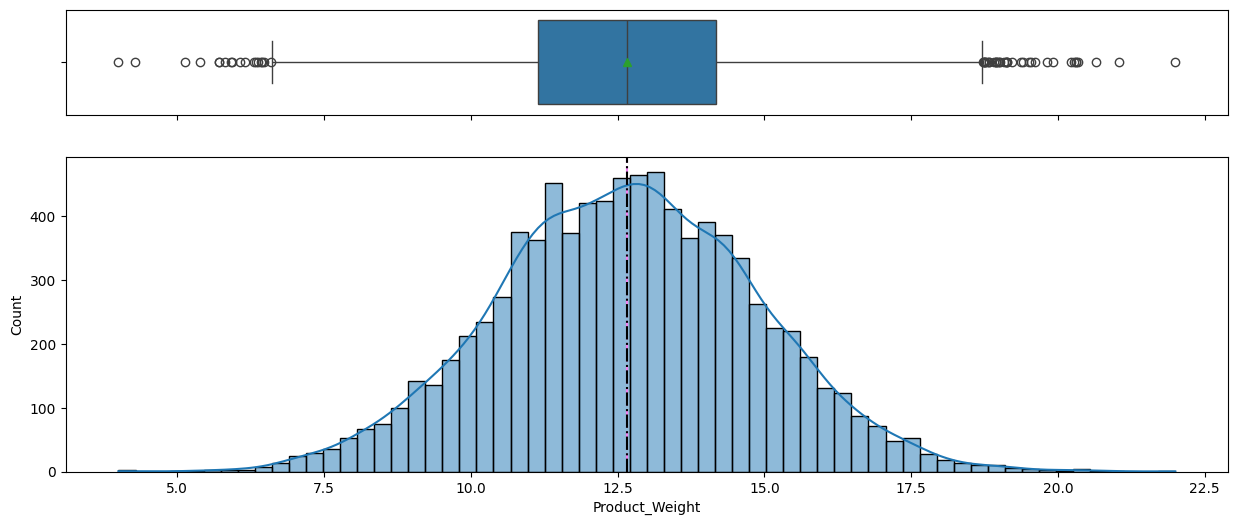

In [24]:
from seaborn.matrix import gridspec
# sns.boxplot(data = df, x = 'Product_Weight')
# sns.histplot( data = df, x = 'Product_Weight', kde = True)

fig, ax = plt.subplots(2,1, figsize = (15,6), gridspec_kw = {'height_ratios' : (1,3)}, sharex=True)

sns.boxplot(data = df, x = 'Product_Weight', showmeans = True, ax = ax[0])
sns.histplot(data = df, x = 'Product_Weight', ax = ax[1], kde = True)
ax[1].axvline(df['Product_Weight'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['Product_Weight'].median(), linestyle = '-.', color = 'black')

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

def histogram_boxplot(df, column, figsize=(15, 6), bins='auto', kde=True, showmeans=True):
    """
    Draws a histogram and a boxplot for a specified column in the dataframe.

    Parameters:
    - df: pandas DataFrame containing the data
    - column: str, name of the column to plot
    - figsize: tuple, size of the figure (width, height)
    - bins: int or sequence or str, specification of bin sizes for the histogram. Default is 'auto'.
    - kde: bool, whether to overlay a kernel density estimate on the histogram
    - showmeans: bool, whether to show the mean value on the boxplot
    """
    # Create figure with two subplots, sharing the x-axis
    fig, ax = plt.subplots(2, 1, figsize=figsize,
                           gridspec_kw={'height_ratios': (1, 3)}, sharex=True)

    # Boxplot on the first subplot
    sns.boxplot(data=df, x=column, showmeans=showmeans, ax=ax[0])

    # Histogram on the second subplot
    sns.histplot(data=df, x=column, bins=bins, kde=kde, ax=ax[1])

    # Adding mean and median lines to the histogram
    mean_value = df[column].mean()
    median_value = df[column].median()
    ax[1].axvline(mean_value, linestyle='--', color='violet', label='Mean')
    ax[1].axvline(median_value, linestyle='-.', color='black', label='Median')

    # Legend for the histogram
    ax[1].legend()

    # Display the plots
    plt.show()

# Example usage:
# histogram_boxplot(df, 'Product_Weight')


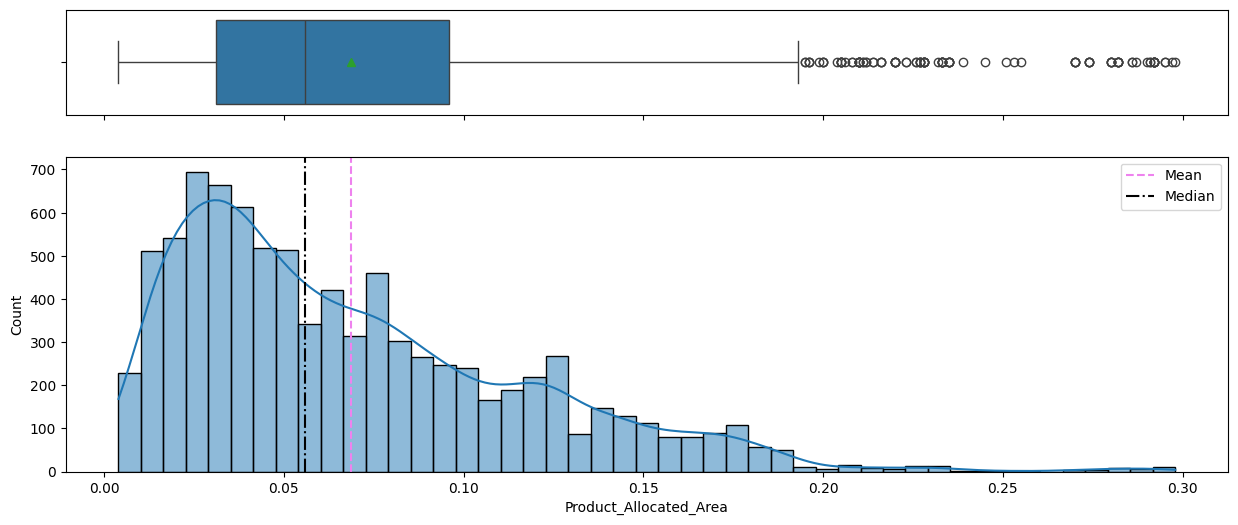

In [26]:
histogram_boxplot(df, 'Product_Allocated_Area')

In [27]:
# mean > median > mode: right skewed
# mean < median < mode: left skewed

In [28]:
# sns.histplot(np.log(df['Product_Allocated_Area'] + .02))

In [29]:
# np.log(df['Product_Allocated_Area'])

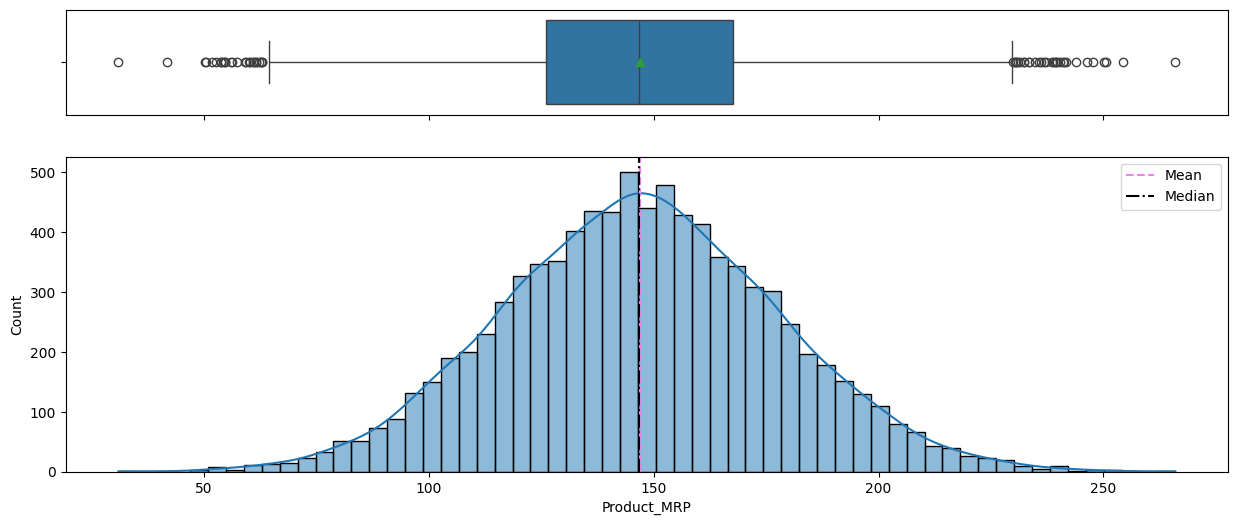

In [30]:
histogram_boxplot(df, "Product_MRP")

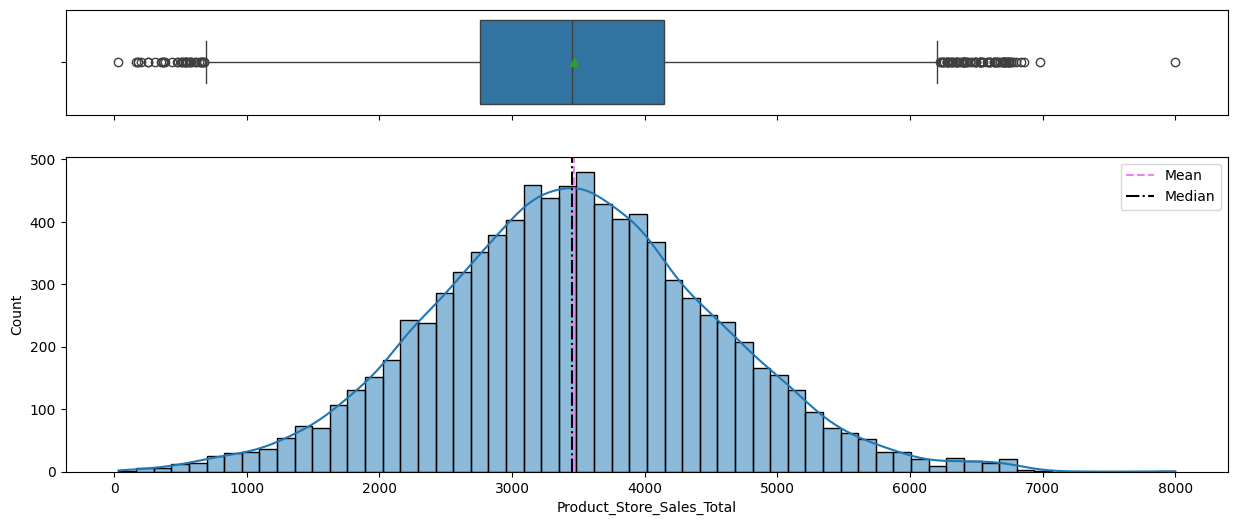

In [31]:
histogram_boxplot(df, "Product_Store_Sales_Total")

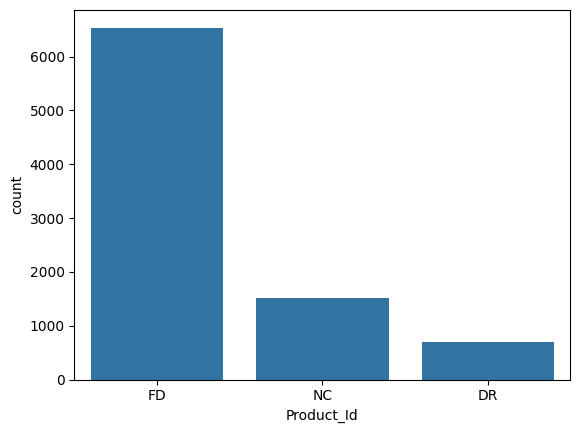

In [32]:
ax = sns.countplot(data = df, x = 'Product_Id')

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Creates a bar plot with counts or percentages labeled above each bar.

    Parameters:
    - data: DataFrame containing the data
    - feature: column name to plot
    - perc: bool, if True, display percentages instead of counts
    - n: int, display the top n categories by count. If None, display all categories.
    """
    total = len(data[feature])  # Total number of data points
    count = data[feature].nunique()  # Unique counts of the feature
    plt.figure(figsize=((min(count, n) if n else count) + 1, 7)) # The 7 was a 5, but I changed it so the top bar number fit
    plt.xticks(rotation=90, fontsize=15)
    order = data[feature].value_counts().index[:n]  # Get the top n categories

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=order
    )

    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2  # The center of the bar
        y = p.get_height()  # The height of the bar
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # Calculate percentage
        else:
            label = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='bottom',
            size=12,
            xytext=(0, 5),
            textcoords='offset points'
        )

    plt.show()

# Example usage:
# labeled_barplot(df, 'your_column_name', perc=True, n=5)


<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


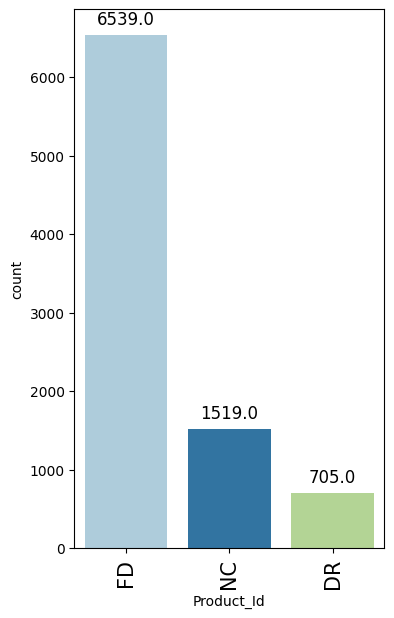

In [34]:
labeled_barplot(df, 'Product_Id')

<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


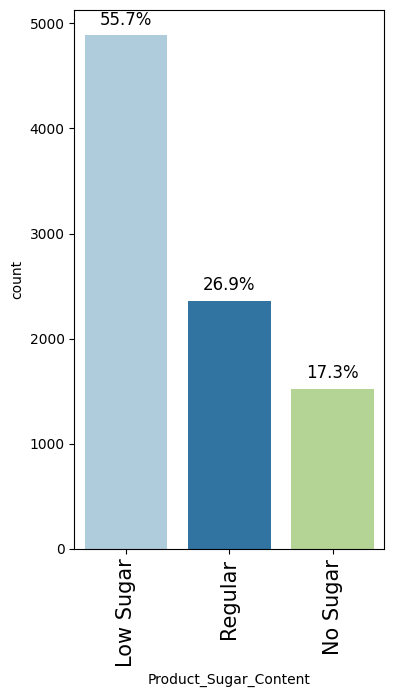

In [35]:
labeled_barplot(df, 'Product_Sugar_Content', perc = True)



<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


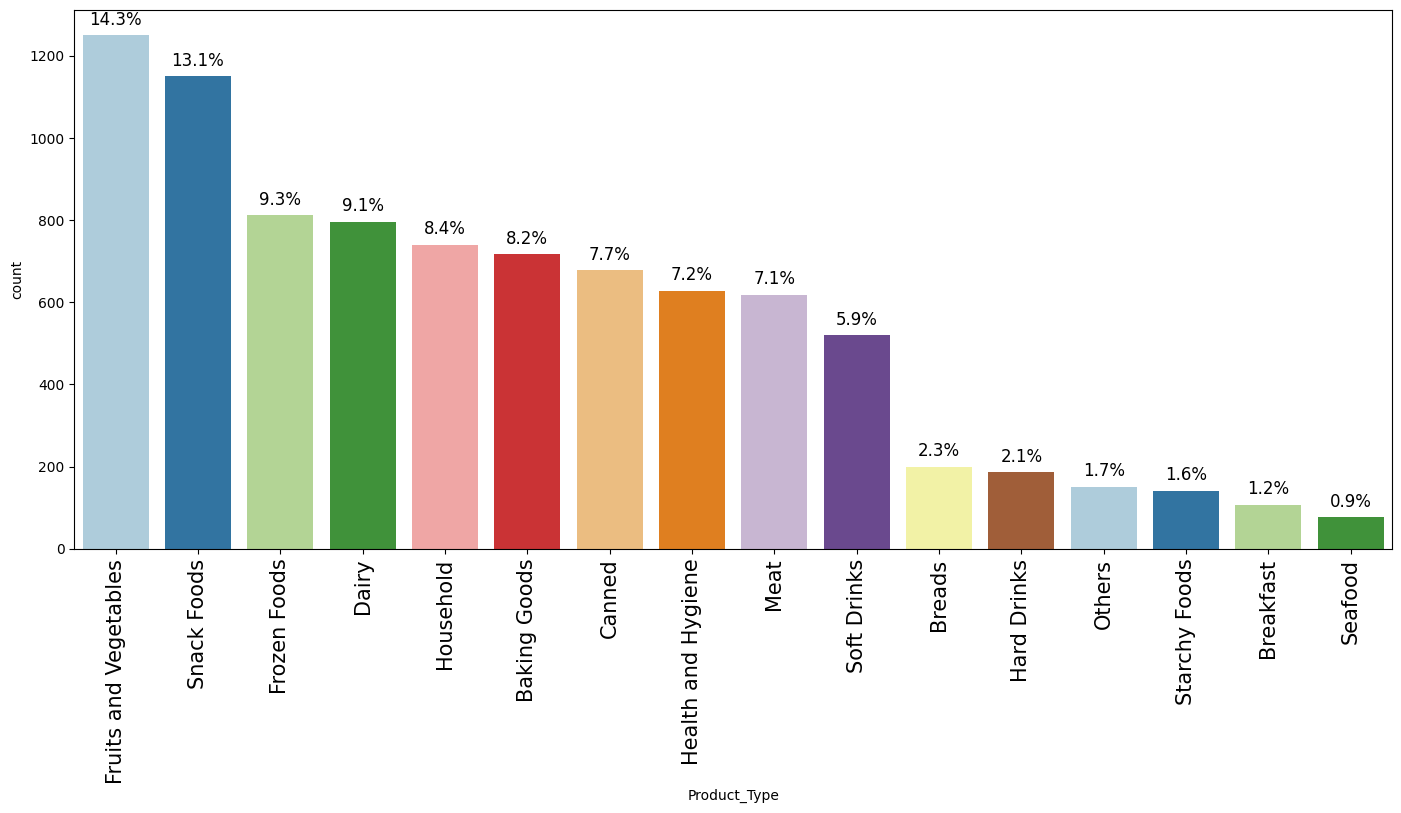

In [36]:
labeled_barplot(df, 'Product_Type', perc = True)

<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


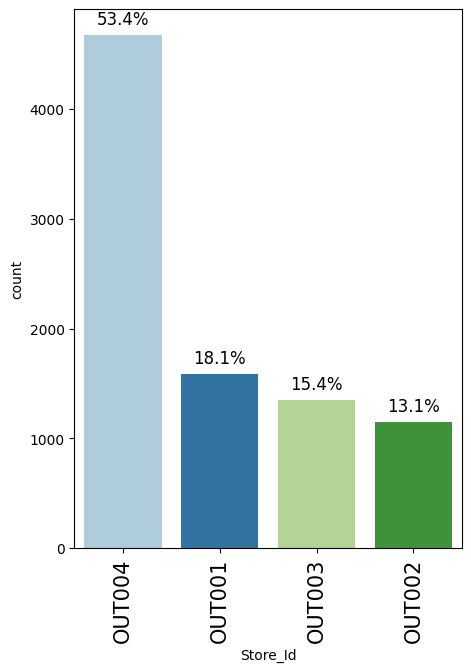

In [37]:
labeled_barplot(df, 'Store_Id', perc = True)

<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


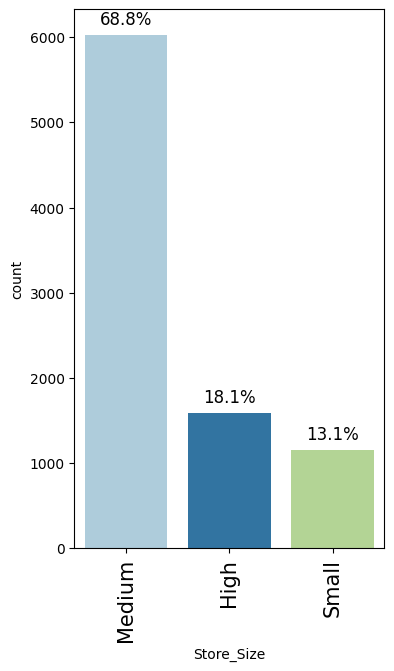

In [38]:
labeled_barplot(df, 'Store_Size', perc = True)

<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


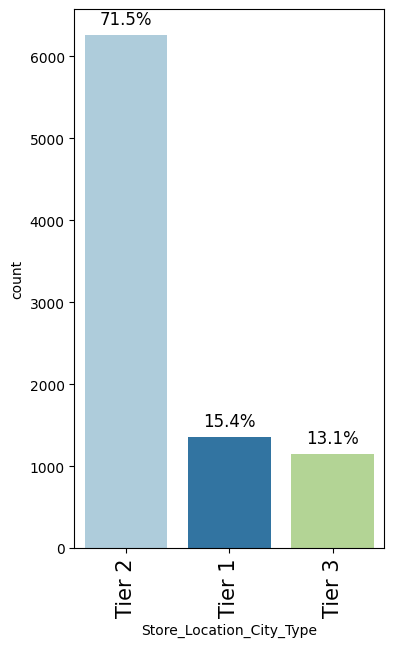

In [39]:
labeled_barplot(df, 'Store_Location_City_Type', perc = True)

<ipython-input-33-bbca4e15f354>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


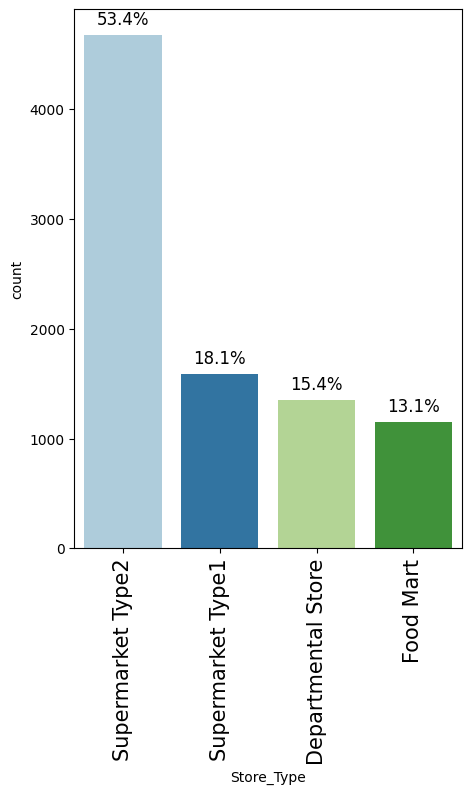

In [40]:
labeled_barplot(df, 'Store_Type', perc = True)

In [41]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
Product_Weight,1.000000,0.014754,0.532716,-0.161907,0.737955
Product_Allocated_Area,0.014754,1.000000,-0.009508,0.004467,-0.000933
Product_MRP,0.532716,-0.009508,1.000000,-0.189357,0.787989
Store_Establishment_Year,-0.161907,0.004467,-0.189357,1.000000,-0.185027
Product_Store_Sales_Total,0.737955,-0.000933,0.787989,-0.185027,1.000000


<ipython-input-44-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

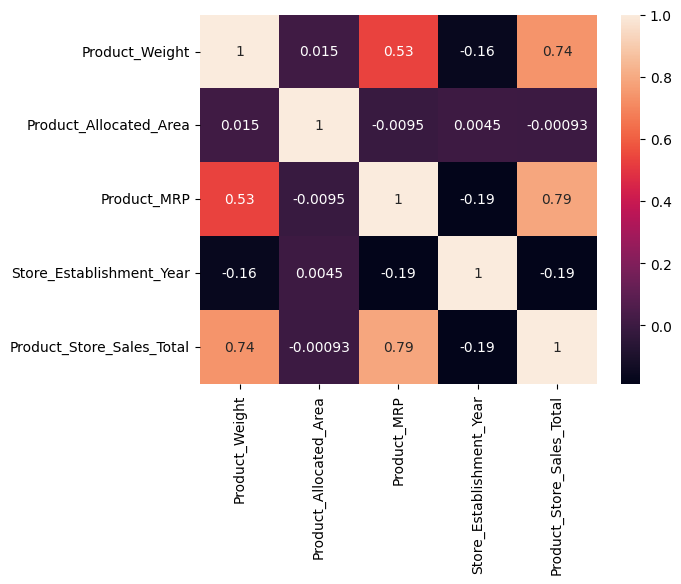

In [44]:
sns.heatmap(df.corr(), annot = True)

In [42]:
df_rev = df.groupby(['Product_Id'], as_index = False)['Product_Store_Sales_Total'].sum()

<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

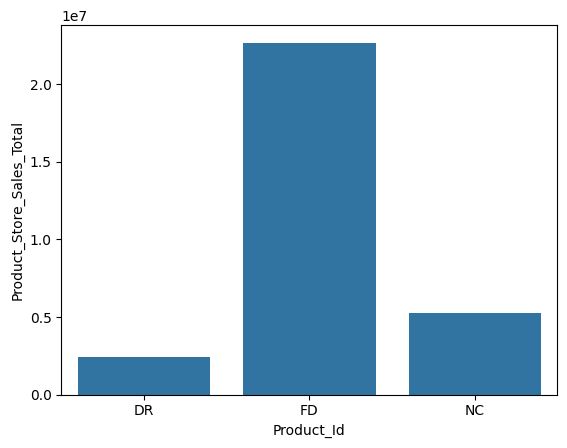

In [43]:
sns.barplot(data = df_rev, x = 'Product_Id', y = 'Product_Store_Sales_Total')

<ipython-input-44-9ac38a2b2ecb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

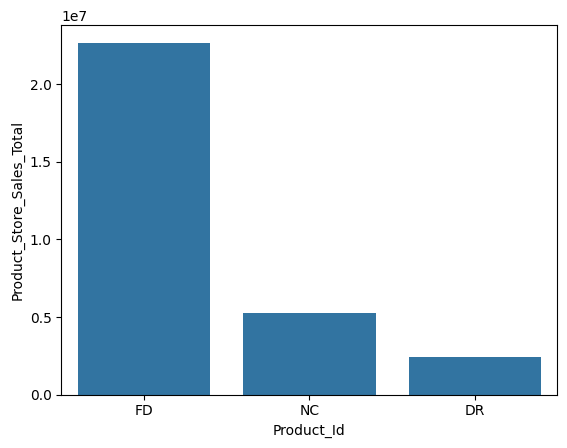

In [44]:
sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

<ipython-input-45-afc131041624>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

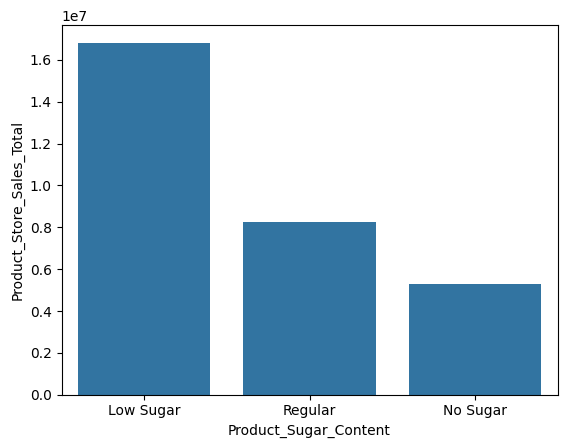

In [45]:
sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

<ipython-input-46-438e7c180a57>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product_Type', y='Product_Store_Sales_Total', estimator=np.sum, ci=None, palette="Paired", order=order)
<ipython-input-46-438e7c180a57>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product_Type', y='Product_Store_Sales_Total', estimator=np.sum, ci=None, palette="Paired", order=order)


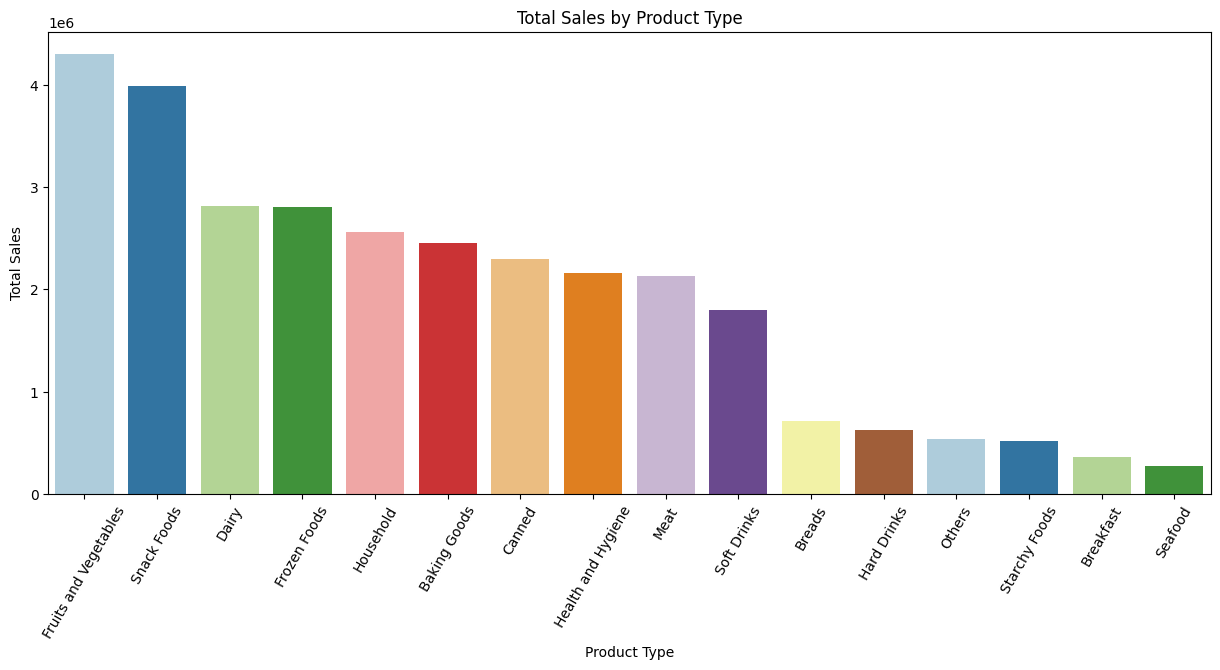

In [46]:
# Calculate the sum of sales for each product type and sort them in descending order to get the order
order = df.groupby('Product_Type')['Product_Store_Sales_Total'].sum().sort_values(ascending=False).index

# Create the barplot
plt.figure(figsize=(15, 6))  # Optional: Adjust the figure size as needed
sns.barplot(data=df, x='Product_Type', y='Product_Store_Sales_Total', estimator=np.sum, ci=None, palette="Paired", order=order)

plt.xticks(rotation=60)  # Optional: Rotate the x-axis labels for better readability
plt.ylabel('Total Sales')  # Optional: Set the y-axis label
plt.xlabel('Product Type')  # Optional: Set the x-axis label
plt.title('Total Sales by Product Type')  # Optional: Set the title of the plot

plt.show()


<ipython-input-47-343ac7c992b3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Id', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)
<ipython-input-47-343ac7c992b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Store_Id', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)


<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

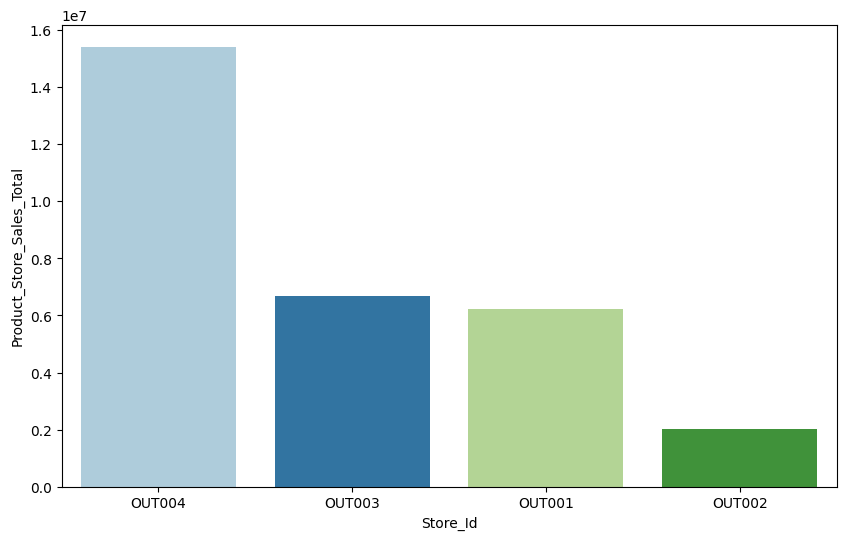

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='Store_Id', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)

<ipython-input-48-40d2924ca32b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Size', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)
<ipython-input-48-40d2924ca32b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Store_Size', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)


<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

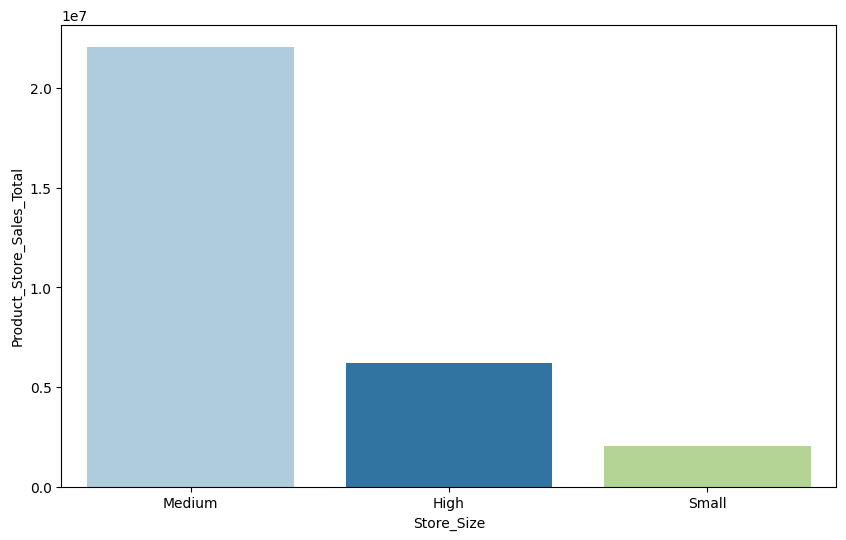

In [48]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='Store_Size', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)

<ipython-input-49-71231020318a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Location_City_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)
<ipython-input-49-71231020318a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Store_Location_City_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)


<Axes: xlabel='Store_Location_City_Type', ylabel='Product_Store_Sales_Total'>

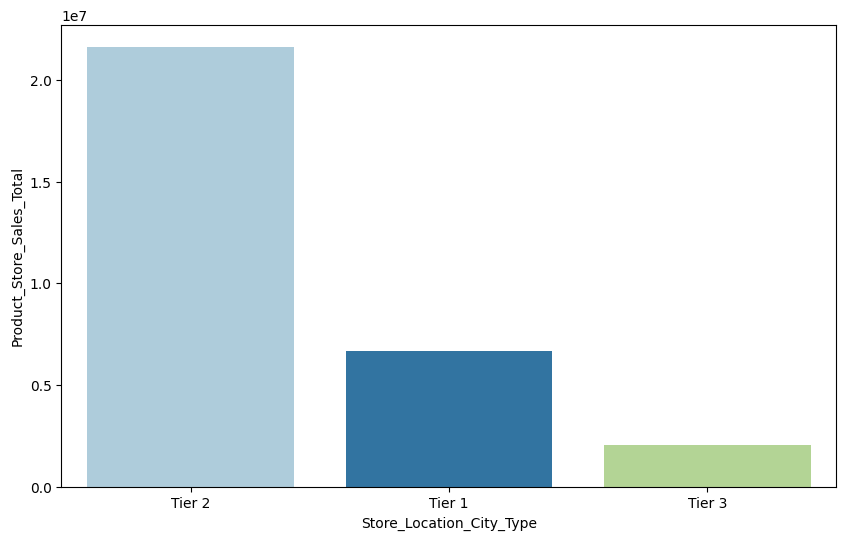

In [49]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='Store_Location_City_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)

<ipython-input-50-a0e3bd7ed55c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)
<ipython-input-50-a0e3bd7ed55c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Store_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)


<Axes: xlabel='Store_Type', ylabel='Product_Store_Sales_Total'>

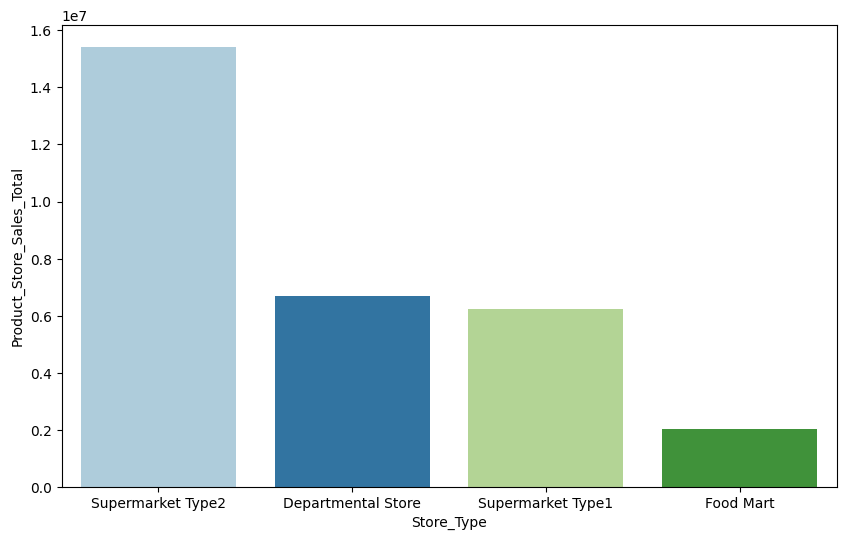

In [50]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='Store_Type', y='Product_Store_Sales_Total', estimator=np.sum, palette="Paired", ci = 1.0)

<ipython-input-51-25bbad2578d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', palette = 'Paired' )


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

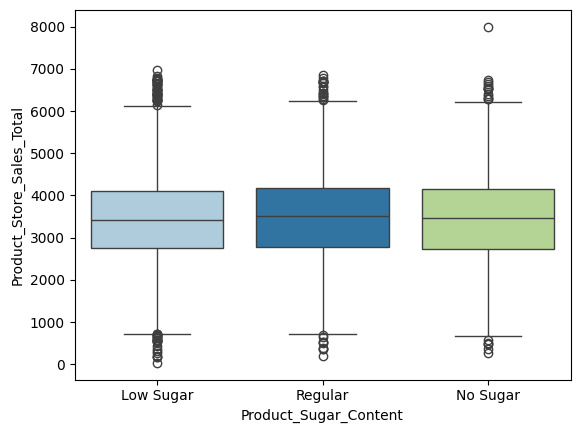

In [51]:
sns.boxplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', palette = 'Paired' )

<ipython-input-52-30c2dc2cbe09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', palette = 'Paired')


<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

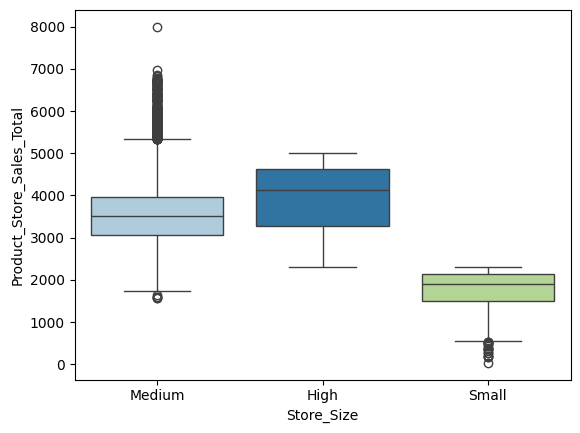

In [52]:
sns.boxplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', palette = 'Paired')

<ipython-input-53-a8c3719d80da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

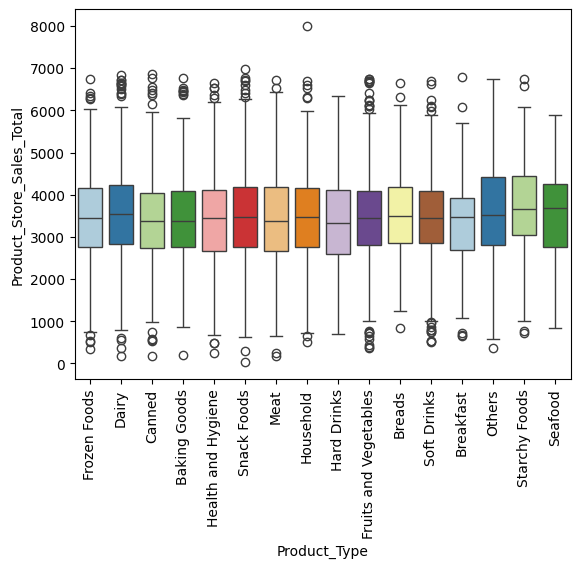

In [53]:
sns.boxplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability


<ipython-input-54-b8a1b3dfae64>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', palette = 'Paired')


([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

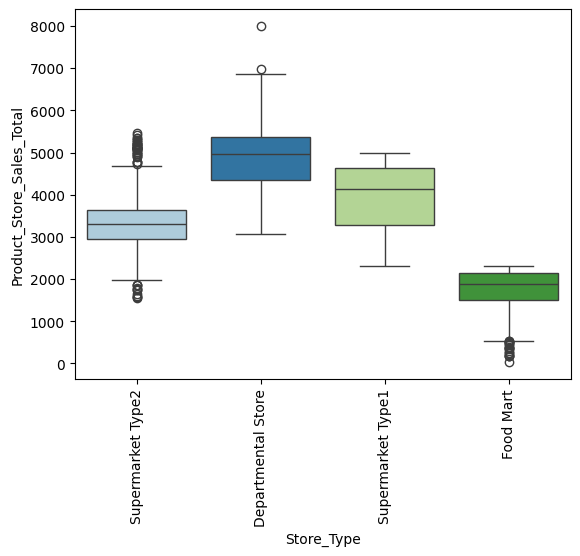

In [54]:
sns.boxplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability

In [55]:
df.groupby('Store_Id')['Product_Store_Sales_Total'].sum()


Store_Id
OUT001     6223113.18
OUT002     2030909.72
OUT003     6673457.57
OUT004    15427583.43
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-56-74b8e58ee1b6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
<ipython-input-56-74b8e58ee1b6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

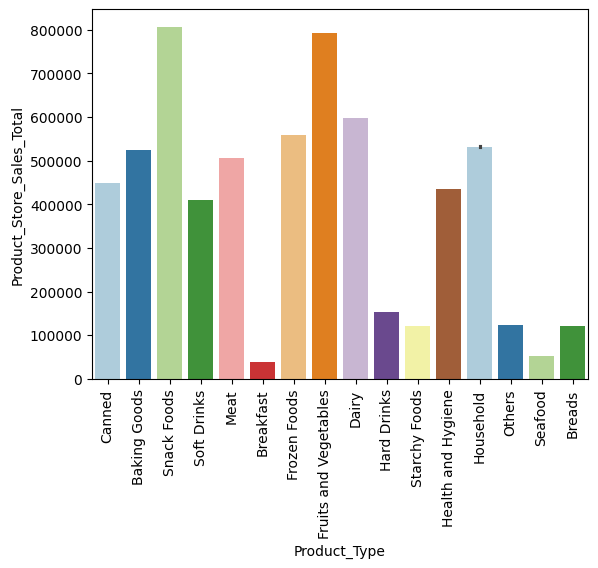

In [56]:
sns.barplot(data = df[df['Store_Id'] =='OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability

<ipython-input-57-cc704985b435>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
<ipython-input-57-cc704985b435>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

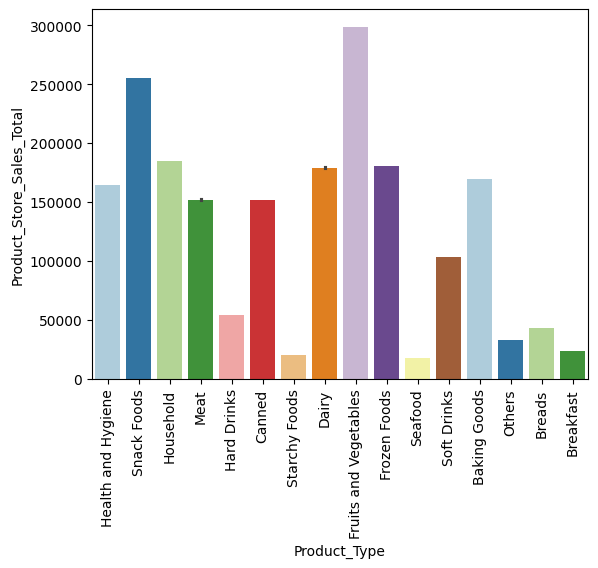

In [57]:
sns.barplot(data = df[df['Store_Id'] =='OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability

<ipython-input-58-438776121c15>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
<ipython-input-58-438776121c15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

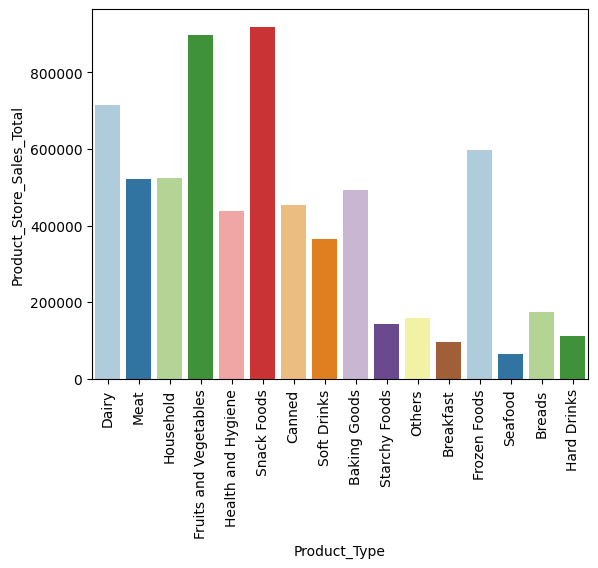

In [58]:
sns.barplot(data = df[df['Store_Id'] =='OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability

<ipython-input-59-4fc7abb396ff>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
<ipython-input-59-4fc7abb396ff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df[df['Store_Id'] =='OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

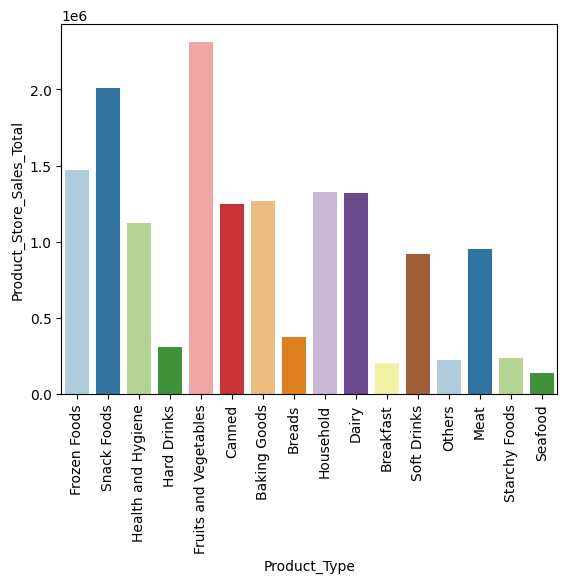

In [59]:
sns.barplot(data = df[df['Store_Id'] =='OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0, palette = 'Paired')
plt.xticks(rotation=90)  # Optional: Rotate the x-axis labels for better readability

<Axes: xlabel='Product_Type', ylabel='Store_Id'>

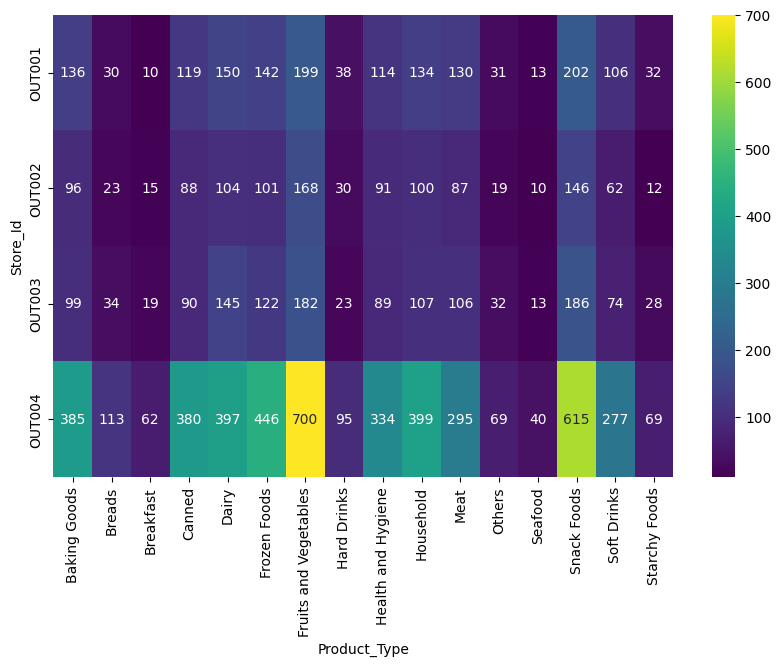

In [60]:
plt.figure(figsize = (10, 6))
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']),
            annot = True,
            cmap = 'viridis',
            fmt = 'g')

<Axes: xlabel='Product_Type', ylabel='Product_Sugar_Content'>

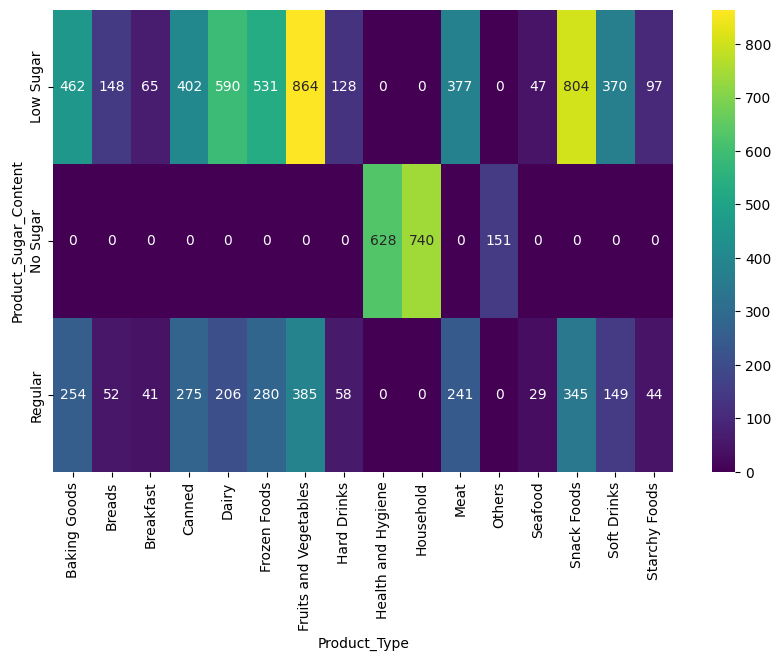

In [61]:
plt.figure(figsize = (10, 6))
sns.heatmap(pd.crosstab(df['Product_Sugar_Content'], df['Product_Type']),
            annot = True,
            cmap = 'viridis',
            fmt = 'g')

In [62]:
df['Store_Age'] = 2024 - df['Store_Establishment_Year']
df.drop(columns = ['Store_Establishment_Year'], axis = 0, inplace = True)

In [63]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,15
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,25


In [64]:
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

In [65]:
Perishables = ['Fruits and Vegetables','Dairy','Meat','Breads', 'Breakfast','Seafood']
def product_type_perishable(X):

  if X in Perishables:
    return 'Perishable'
  else:
    return 'Non Perishable'

In [66]:
df['Product_Type_Categories'] = df['Product_Type'].apply(product_type_perishable)

In [67]:
df.head(2)


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,15,Non Perishable
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,25,Perishable


In [68]:
df['Product_Type_Categories'].value_counts(1)

Non Perishable    0.652516
Perishable        0.347484
Name: Product_Type_Categories, dtype: float64

In [69]:
df.drop(columns = ['Product_Type'], axis = 0, inplace = True)

In [70]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,15,Non Perishable
1,FD,16.54,Low Sugar,0.144,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,25,Perishable
2,FD,14.28,Regular,0.031,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,37,Non Perishable
3,FD,12.10,Low Sugar,0.112,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,37,Non Perishable
4,NC,9.57,No Sugar,0.010,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,26,Non Perishable


In [71]:
num_cols = df.select_dtypes(include = np.number).columns.to_list()
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Product_Store_Sales_Total',
 'Store_Age']

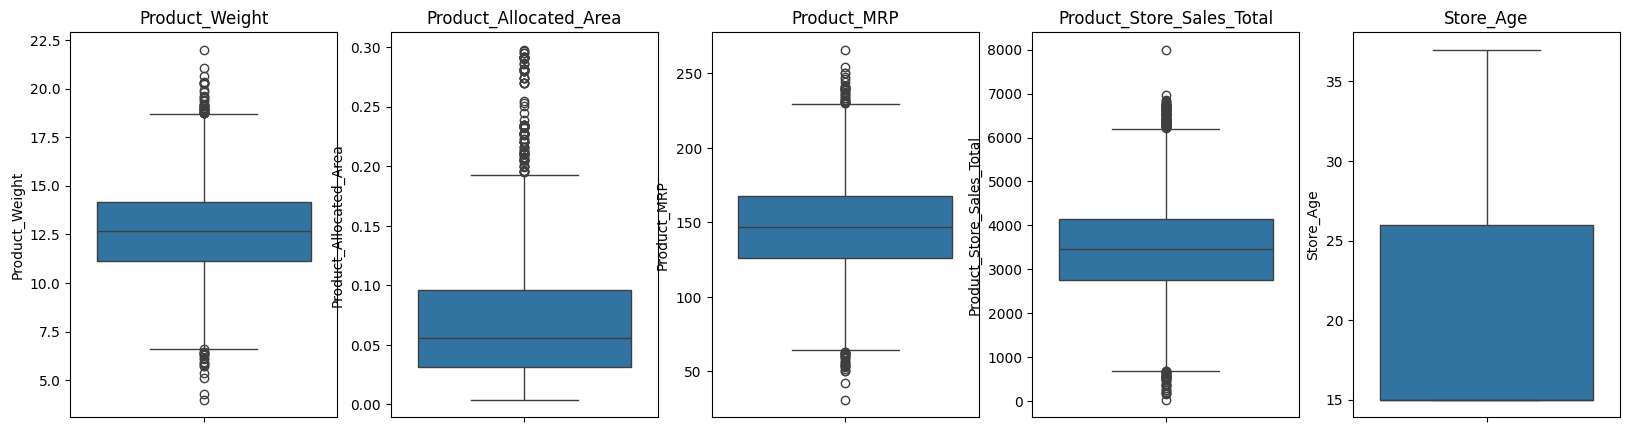

In [72]:
fig, ax = plt.subplots(1,5, figsize = (20,5))

j = 0
for i in num_cols:

  sns.boxplot(df[i], ax = ax[j]).set(title = i)
  j += 1

In [79]:
df.select_dtypes(include = ['object', 'category']).columns.to_list()

['Product_Id',
 'Product_Sugar_Content',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Type_Categories']

In [81]:
# Perform OHE
df_ohe = pd.get_dummies(df,
               columns = df.select_dtypes(include = ['object', 'category']).columns.to_list(),
               drop_first= True
               )


In [82]:
df_ohe.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
0,12.66,0.027,117.08,2842.40,15,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
1,16.54,0.144,171.43,4830.02,25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,14.28,0.031,162.08,4130.16,37,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,12.10,0.112,186.31,4132.18,37,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.57,0.010,123.67,2279.36,26,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0


In [86]:
X = df_ohe.drop('Product_Store_Sales_Total', axis = 1)
y = df_ohe['Product_Store_Sales_Total']

In [87]:
X.shape

(8763, 19)

In [88]:
y.shape

(8763,)

In [89]:
import statsmodels.api as sm

In [90]:
X = sm.add_constant(X)

In [92]:
X.head(5)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
0,1.0,12.66,0.027,117.08,15,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
1,1.0,16.54,0.144,171.43,25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1.0,14.28,0.031,162.08,37,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,1.0,12.10,0.112,186.31,37,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1.0,9.57,0.010,123.67,26,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [95]:
X_train.shape

(6134, 20)

In [97]:
X_test.shape

(2629, 20)

In [98]:
y_test.shape

(2629,)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns

VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Product_Id_FD,2.841545
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.086384
8,Store_Id_OUT002,inf
9,Store_Id_OUT003,inf


In [129]:
# X_train.drop(columns=['Store_Age'], axis = 0, inplace = True) # Dropping Store Age because it is a numerical value with VIF INF

In [107]:
X_test.drop(columns=['Store_Age'], axis = 0, inplace = True)

In [130]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns

VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Product_Id_FD,2.841545
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.086384
8,Store_Id_OUT002,inf
9,Store_Id_OUT003,inf


In [109]:
X_train.head()

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
8361,1.0,7.86,0.120,144.42,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2244,1.0,14.59,0.052,154.95,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5530,1.0,11.12,0.069,121.96,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
322,1.0,12.16,0.084,130.67,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
4688,1.0,12.02,0.089,153.28,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0


In [110]:
y_train.head()

8361    2316.49
2244    4053.82
5530    2592.95
322     3006.41
4688    3438.30
Name: Product_Store_Sales_Total, dtype: float64

In [131]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                               16:49:56   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                       136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area                57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                           13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                        -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                         11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular         23.1491     13.552      1.708      0.088      -3.418      49.717
Store_Id_OUT002                     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                      331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                     -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                    169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2      -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart                -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1          70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2        -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Product_Type_Categories_Perishable    26.8072     13.404      2.000      0.046       0.530      53.085
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     4.28e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
y_hat = model.predict(X_train)

In [133]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [134]:
r2_score(y_train, y_hat)

0.8208895053824232

In [135]:
mean_squared_error(y_train, y_hat)

204716.9688103638

In [143]:
def model_evaluation(model, X, y):

  y_hat = model.predict(X)

  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)
  r2 = r2_score(y, y_hat)

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

In [144]:
model_evaluation(model, X_train, y_train)

,RMSE,MAE,MAPE,R2
0,452.456593,262.597661,0.100454,0.82089


In [146]:
model_evaluation(model, X_test, y_test)

,RMSE,MAE,MAPE,R2
0,432.787951,252.636159,0.096217,0.832444


In [ ]:
# model.summary()

In [147]:
model.resid # y_train - model.predict(X_train)

8361   -603.074098
2244     80.560876
5530   -247.704609
322     -91.443136
4688     39.545034
           ...    
4373     44.797511
7891    248.902223
4859    122.286259
3264     82.168624
2732     -7.059983
Length: 6134, dtype: float64

In [150]:
# Mean

np.mean(model.resid) # Value needs to be almost zero if the model is trained well

2.7287806474452187e-12

In [ ]:
# model.resid
# model.fittedvalues # model.predict(X_train)

Text(0.5, 1.0, 'Residuals vs Fitted Values')

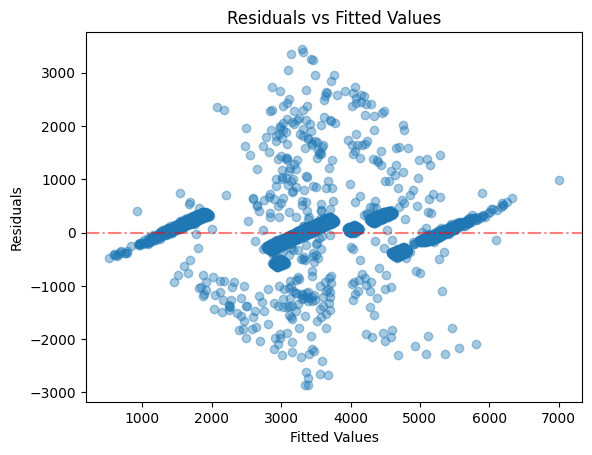

In [161]:
plt.scatter(model.fittedvalues, model.resid, alpha = 0.4)
plt.axhline(0, color = 'r', alpha = 0.5, linestyle = '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

In [157]:
import statsmodels.stats.api as sms

In [158]:
result = sms.het_goldfeldquandt(y_train, X_train)

In [160]:
result[1] # > 0.05 :significance level, This model is Homoscedastic and this model passes

0.9975938945640488

In [ ]:
# Linearity of Variables

Residual vs Fitted values



<Axes: ylabel='Count'>

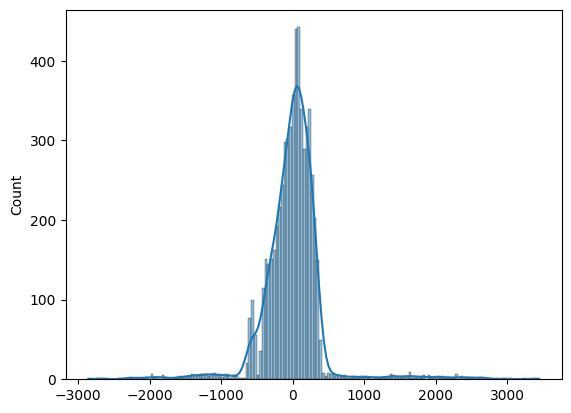

In [162]:
# Normality of error

sns.histplot(model.resid, kde = True)

((array([-3.68803911, -3.45585563, -3.3280438 , ...,  3.3280438 ,
          3.45585563,  3.68803911]),
  array([-2858.79890544, -2855.22538302, -2720.42581562, ...,
          3349.7209442 ,  3381.1126455 ,  3445.79253939])),
 (395.06359610717976, 2.6553770416903878e-12, 0.8726675013810739))

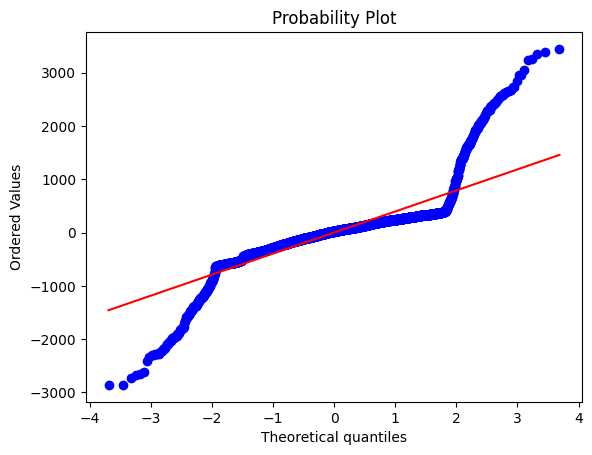

In [164]:
import pylab
from scipy import stats

stats.probplot(model.resid, dist = 'norm', plot = pylab)

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [167]:
model2 = LinearRegression()

mae_ = cross_val_score(model2, X_train, y_train, cv = 10, scoring='neg_mean_absolute_percentage_error')



In [169]:
np.mean(-mae_)

0.10079422025575147

In [170]:
np.std(mae_)

0.01059073297833426

In [172]:
# 99.7% of the time:
 (np.mean(-mae_) - 3 * np.std(-mae_), np.mean(-mae_) + 3 * np.std(mae_))

(0.0690220213207487, 0.13256641919075424)

In [174]:
np.mean(cross_val_score(model2, X_test, y_test, cv = 10, scoring='neg_mean_absolute_percentage_error'))


-0.09495907825148894